# echo

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import wave
import sys

from scipy.io.wavfile import write

In [2]:
"""
    If you right-click on the file and go to "Get Info", you can see:
    sampling rate = 16000 Hz
    bits per sample = 16
    The first is quantization in time
    The second is quantization in amplitude
    We also do this for images!
    2^16 = 65536 is how many different sound levels we have
    2^8 * 2^8 * 2^8 = 2^24 is how many different colors we can represent
"""

spf = wave.open('data/helloworld.wav', 'r')

In [3]:
# Extract Raw Audio from Wav File
signal = spf.readframes(-1)
signal = np.fromstring(signal, 'Int16')  # byte to array - deprecated.
print("numpy signal:", signal.shape)

numpy signal: (18432,)


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  This is separate from the ipykernel package so we can avoid doing imports until


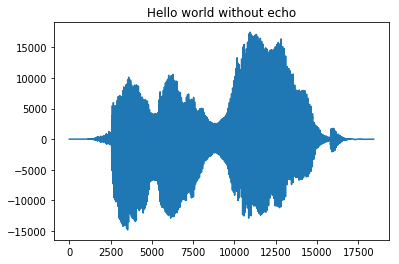

In [4]:
plt.plot(signal)
plt.title("Hello world without echo")
plt.show()

In [5]:
# remove echo
delta = np.array([1., 0., 0.])          # 0보다 크거나 같으면 1, 아니면 0 리턴
noecho = np.convolve(signal, delta)     # Returns the discrete, linear convolution of two one-dimensional sequences.
print("noecho signal:", noecho.shape)

assert(np.abs(noecho[:len(signal)] - signal).sum() < 0.000001)

noecho signal: (18434,)


In [6]:
noecho = noecho.astype(np.int16)        # make sure you do this, otherwise, you will get VERY LOUD NOISE
write('data/noecho.wav', 16000, noecho)

In [7]:
# insert echo
# 1. add a quieter signal
# 2. quieter signal is shifted to the right

filt = np.zeros(16000)
filt[0] = 1
filt[4000] = 0.6
filt[8000] = 0.3
filt[12000] = 0.2
filt[15999] = 0.1
out = np.convolve(signal, filt)

out = out.astype(np.int16)              # make sure you do this, otherwise, you will get VERY LOUD NOISE
write('data/echo_out.wav', 16000, out)

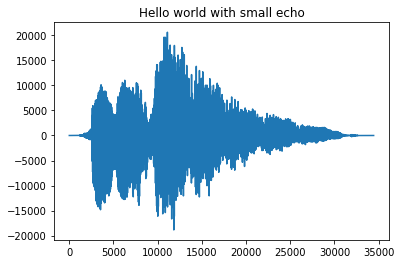

In [8]:
plt.plot(out)
plt.title("Hello world with small echo")
plt.show()